In [45]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('parsed_news.csv', sep=';')

In [4]:
df

,url,date and time,tag,title,text
0,https://www.kommersant.ru/doc/973901,"22.04.2004, 17:39",Мир,\r\n Абашидзе упразднил МГБ Аджарии\r\n...,Глава Аджарии Аслан Абашидзе принял решение об...
1,https://www.kommersant.ru/doc/2200895,"30.05.2013, 18:15",Общество,\r\n РЖД будут продавать билеты через «...,С 1 июля Российские железные дороги начнут про...
2,https://www.kommersant.ru/doc/3859122,"18.01.2019, 20:48",Финансы,\r\n Объем операций в биткойнах...,Использование биткойнов для оплаты товаров и у...
3,https://www.kommersant.ru/doc/5347136,"09.05.2022, 20:55",Смерть Елизаветы II,\r\n Королева Елизавета II проп...,Королева Великобритании Елизавета II не будет ...
4,https://www.kommersant.ru/doc/1171617,"17.05.2009, 19:39",Общество,\r\n Япония и Великобритания сообщили о...,Число официально подтвержденных случаев зараже...
...,...,...,...,...,...
1460967,https://86.ru/text/relations/2023/11/19/729287...,NaN,[],"Львов охватит страсть, а Скорпионов — сомнения...",NaN
1460968,https://86.ru/text/gorod/2023/11/19/72930146/,2023.11.19,[],"Отписки женам военных, корь и ковид, помощь Ка...",NaN
1460969,https://ngs24.ru/text/criminal/2023/11/18/7292...,2023.11.18,[],Друг 12-летнего школьника из Ачинска признался...,NaN
1460970,https://86.ru/text/entertainment/2023/11/19/72...,2023.11.19,[],Наследство в миллиард: как дети Александра Гра...,NaN


In [5]:
# Размер датасета
df.shape

(1460972, 5)

In [6]:
df.duplicated().sum()

1024

In [7]:
df = df.drop_duplicates()

In [7]:
len(df['tag'].unique())

106409

In [8]:
df.isnull().sum()

url                1
date and time    118
tag              287
title            148
text             570
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

url              0
date and time    0
tag              0
title            0
text             0
dtype: int64

In [13]:
df['tag'].value_counts().get('[]', 0)

171310

In [14]:
df.drop(df[df['tag'] == '[]'].index, inplace=True)

In [16]:
#df.shape

(1287751, 5)

In [18]:
df['title'].replace('\n', '', regex=True, inplace=True)
df['title'].replace('\r', '', regex=True, inplace=True)

df['text'].replace('\n', '', regex=True, inplace=True)
df['text'].replace('\r', '', regex=True, inplace=True)

In [19]:
df.reset_index(drop=True, inplace=True)

In [21]:
df.loc[4490]
df.at[4490, 'date and time'] = '2011-02-21 12:00:00'

In [22]:
df.loc[45575]

url                          https://www.kommersant.ru/doc/1419569
date and time                                    01.01.0001, 00:00
tag                                             Лента новостей\r\n
title                    В США на сталелитейном заводе прогреме...
text             По меньшей мере 14 человек получили ранения пр...
Name: 45575, dtype: object

In [23]:
df['date and time'].value_counts().get('01.01.0001, 00:00', 0)

4

In [24]:
df.drop(df[df['date and time'] == '01.01.0001, 00:00'].index, inplace=True)

In [25]:
df['date and time'].replace('января', '01', regex=True, inplace=True)
df['date and time'].replace('февраля', '02', regex=True, inplace=True)
df['date and time'].replace('марта', '03', regex=True, inplace=True)
df['date and time'].replace('апреля', '04', regex=True, inplace=True)
df['date and time'].replace('мая', '05', regex=True, inplace=True)
df['date and time'].replace('июня', '06', regex=True, inplace=True)
df['date and time'].replace('июля', '07', regex=True, inplace=True)
df['date and time'].replace('августа', '08', regex=True, inplace=True)
df['date and time'].replace('сентября', '09', regex=True, inplace=True)
df['date and time'].replace('октября', '10', regex=True, inplace=True)
df['date and time'].replace('ноября', '11', regex=True, inplace=True)
df['date and time'].replace('декабря', '12', regex=True, inplace=True)

In [26]:
df['date and time'] = df['date and time'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notna(x) else x)

In [27]:
df['text'] = df['text'].str.replace('[\[\]]', '', regex=True)

In [28]:
df

,url,date and time,tag,title,text
0,https://www.kommersant.ru/doc/973901,2004-04-22 17:39:00,Мир,Абашидзе упразднил МГБ Аджарии,Глава Аджарии Аслан Абашидзе принял решение об...
1,https://www.kommersant.ru/doc/2200895,2013-05-30 18:15:00,Общество,РЖД будут продавать билеты через «Почт...,С 1 июля Российские железные дороги начнут про...
2,https://www.kommersant.ru/doc/3859122,2019-01-18 20:48:00,Финансы,Объем операций в биткойнах в д...,Использование биткойнов для оплаты товаров и у...
3,https://www.kommersant.ru/doc/5347136,2022-09-05 20:55:00,Смерть Елизаветы II,Королева Елизавета II пропусти...,Королева Великобритании Елизавета II не будет ...
4,https://www.kommersant.ru/doc/1171617,2009-05-17 19:39:00,Общество,Япония и Великобритания сообщили о нов...,Число официально подтвержденных случаев зараже...
...,...,...,...,...,...
1287746,https://www.fontanka.ru/2023/11/16/72922028/,2023-11-16 00:00:00,"['Археологические находки', 'Петербург']",В Петропавловской крепости покажут археологиче...,"На экспозиции вы увидите предметы, найденные в..."
1287747,https://www.fontanka.ru/2023/11/16/72921512/,2023-11-16 00:00:00,['Блокада Ленинграда'],"В Доме Матюшина откроют выставку, посвященную ...",Название проекта в Музее петербургского аванга...
1287748,https://www.fontanka.ru/2023/11/14/72914111/,2023-11-14 00:00:00,"['Фотографии', 'РОСФОТО']",В «Росфото» покажут «телевизор XIX века» — ста...,Выставка с названием «Зачем нам два глаза?» ра...
1287749,https://www.fontanka.ru/2023/11/17/72923615/,2023-11-17 00:00:00,"['Развлечения', 'Музыка', 'Тест', 'Песни', 'Юм...",Все неправильно слышали слова этих песен. А чт...,Очень много воспоминаний у нас с вами оставили...


In [29]:
df['tag'] = df['tag'].replace({',': '', '\[': '', '\]': ''}, regex=True)

In [30]:
df['tag1'] = df['tag'].apply(lambda x: x if "'" not in x else None)
df['tag1'] = df['tag1'].combine_first(df['tag'].str.extract(r"'([^']{1,})'", expand=False))

df['tag2'] = df['tag'].str.extract(r"'[^']{1,}'\s*'([^']{1,})'", expand=False)
df['tag3'] = df['tag'].str.extract(r"'[^']{1,}'\s*'[^']{1,}'\s*'([^']{1,})'", expand=False)

In [31]:
df['date and time'] = pd.to_datetime(df['date and time'])

df = df[df['date and time'].dt.year >= 2001]

In [32]:
df = df.drop('tag', axis=1)

In [33]:
df

,url,date and time,title,text,tag1,tag2,tag3
0,https://www.kommersant.ru/doc/973901,2004-04-22 17:39:00,Абашидзе упразднил МГБ Аджарии,Глава Аджарии Аслан Абашидзе принял решение об...,Мир,NaN,NaN
1,https://www.kommersant.ru/doc/2200895,2013-05-30 18:15:00,РЖД будут продавать билеты через «Почт...,С 1 июля Российские железные дороги начнут про...,Общество,NaN,NaN
2,https://www.kommersant.ru/doc/3859122,2019-01-18 20:48:00,Объем операций в биткойнах в д...,Использование биткойнов для оплаты товаров и у...,Финансы,NaN,NaN
3,https://www.kommersant.ru/doc/5347136,2022-09-05 20:55:00,Королева Елизавета II пропусти...,Королева Великобритании Елизавета II не будет ...,Смерть Елизаветы II,NaN,NaN
4,https://www.kommersant.ru/doc/1171617,2009-05-17 19:39:00,Япония и Великобритания сообщили о нов...,Число официально подтвержденных случаев зараже...,Общество,NaN,NaN
...,...,...,...,...,...,...,...
1287746,https://www.fontanka.ru/2023/11/16/72922028/,2023-11-16 00:00:00,В Петропавловской крепости покажут археологиче...,"На экспозиции вы увидите предметы, найденные в...",Археологические находки,Петербург,NaN
1287747,https://www.fontanka.ru/2023/11/16/72921512/,2023-11-16 00:00:00,"В Доме Матюшина откроют выставку, посвященную ...",Название проекта в Музее петербургского аванга...,Блокада Ленинграда,NaN,NaN
1287748,https://www.fontanka.ru/2023/11/14/72914111/,2023-11-14 00:00:00,В «Росфото» покажут «телевизор XIX века» — ста...,Выставка с названием «Зачем нам два глаза?» ра...,Фотографии,РОСФОТО,NaN
1287749,https://www.fontanka.ru/2023/11/17/72923615/,2023-11-17 00:00:00,Все неправильно слышали слова этих песен. А чт...,Очень много воспоминаний у нас с вами оставили...,Развлечения,Музыка,Тест


In [34]:
# Сохраняем обработанный датасет
df.to_csv('parsed_news_EDA.csv', index=False, sep=';')

In [35]:
len(df['tag1'].unique())

1486

In [37]:
# Создаем датафрейм с обработанными данными
df = pd.read_csv('parsed_news_EDA.csv', sep=';')

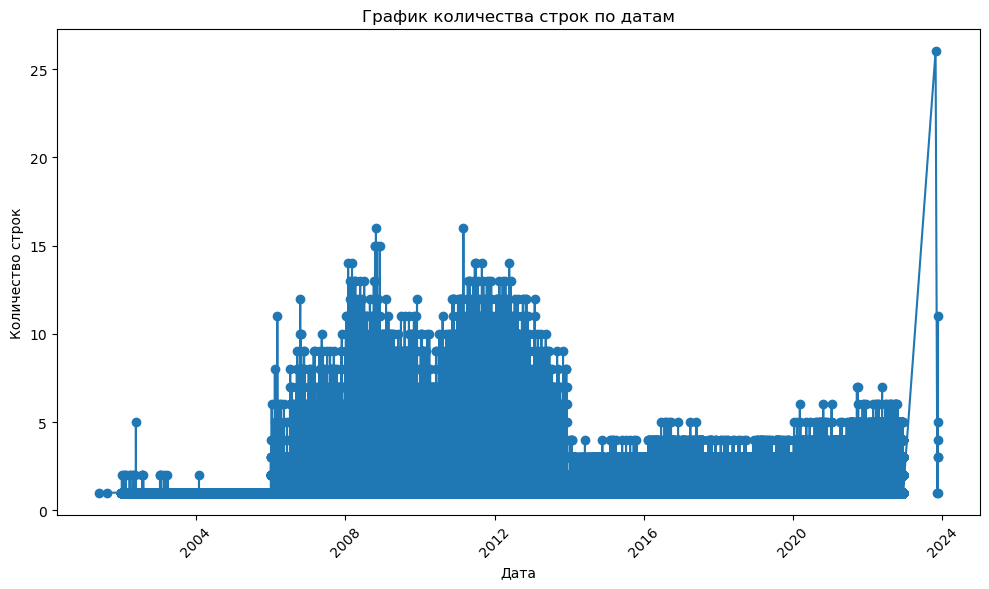

In [38]:
# Строим график количества строк по датам
df['date and time'] = pd.to_datetime(df['date and time'])

date_counts = df['date and time'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')
plt.title('График количества строк по датам')
plt.xlabel('Дата')
plt.ylabel('Количество строк')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

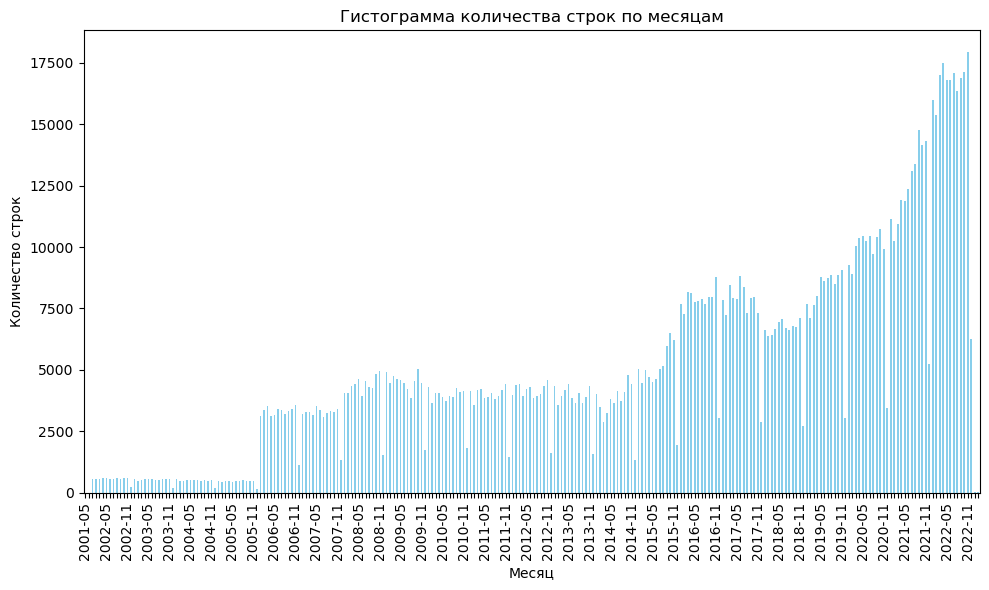

In [39]:
monthly_counts = df.groupby(df['date and time'].dt.to_period("M")).size()

plt.figure(figsize=(10, 6))
ax = monthly_counts.plot(kind='bar', color='skyblue')

every_nth = 6
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i % every_nth != 0:
        tick.label1.set_visible(False)

plt.title('Гистограмма количества строк по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество строк')
plt.tight_layout()
plt.show()

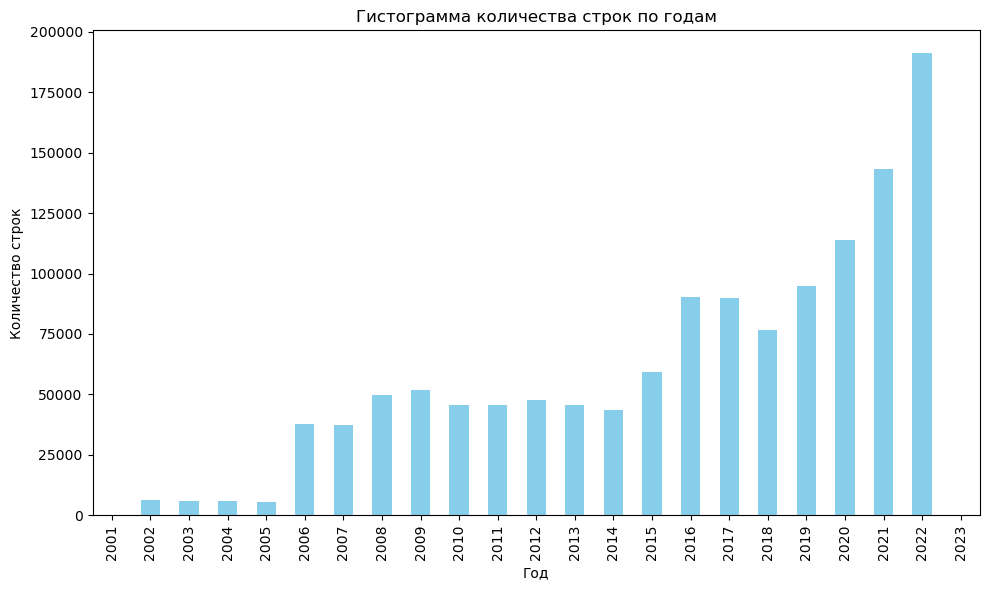

In [40]:
yearly_counts = df.groupby(df['date and time'].dt.to_period("Y")).size()

# Построим гистограмму, отображая каждый год на оси x
plt.figure(figsize=(10, 6))
ax = yearly_counts.plot(kind='bar', color='skyblue')

# Выберем каждый год для отображения на оси x
every_nth = 1
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i % every_nth != 0:
        tick.label1.set_visible(False)

plt.title('Гистограмма количества строк по годам')
plt.xlabel('Год')
plt.ylabel('Количество строк')
plt.tight_layout()
plt.show()

In [42]:
top_tags = df['tag1'].value_counts().head(40)
top_tags

Россия                          193350
Мир                             180037
Экономика                        99998
Спорт                            84709
Бывший СССР                      83486
Наука и техника                  65139
Культура                         58214
Интернет и СМИ                   50633
Силовые структуры                38601
Из жизни                         36157
Среда обитания                   33231
Бизнес                           21622
Путешествия                      20460
Ценности                         20187
Происшествия                     19976
Москва                           13297
Правительство РФ                 12576
Общество                         12308
Полиция                          11561
Владимир Путин                   11219
Политика                         11078
МИД РФ                           10213
США                              10181
Украина                           6857
МВД                               5704
Армия                    

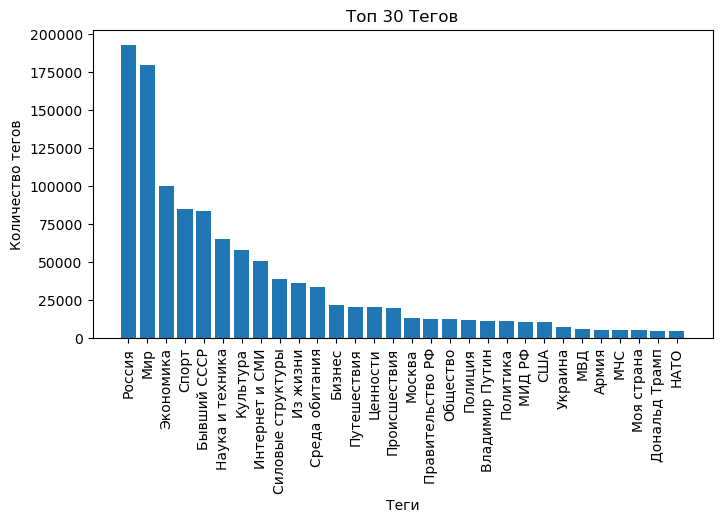

In [77]:
plt.figure(figsize=(8, 4))

# Создаем список с тегами и их количествами
tags = top_tags[:30].index.tolist() 
counts = top_tags[:30].tolist()

# Строим столбчатую диаграмму
plt.bar(tags, counts)

plt.title('Топ 30 Тегов') 
plt.xlabel('Теги') 
plt.ylabel('Количество тегов') 
plt.xticks(rotation=90) 
plt.show()